In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [27]:
df = pd.read_csv("5G_bw.csv")
df.head()

,time,signal,rx bitrate,tx bitrate,mcs_number_rx,mcs_number_tx,bandwidth_tx,bandwidth_rx,connections,bitrate1 5G,bitrate2 5G
0,0.000000,-37dBm,1.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,1.0,4,173.6,4.8
1,1.063121,-46dBm,1.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,1.0,4,173.6,4.8
2,1.068273,-47dBm,1.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,1.0,4,173.6,4.8
3,1.090768,-47dBm,2.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,2.0,4,173.6,4.8
4,1.098285,-46dBm,2.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,2.0,4,173.6,4.8


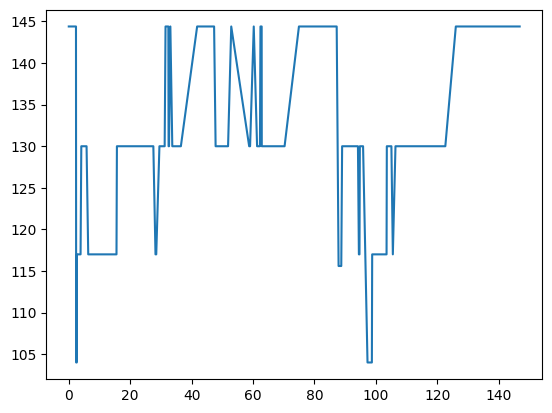

In [28]:
plt.figure()

plt.plot(df["time"],df["bandwidth_tx"])

In [29]:
griddata(df["time"],df["bandwidth_tx"], 10, method='nearest')

array(117.)

In [30]:
tx_bw = []
t = []

for i in range(140):
    temp=(i+1)
    tx_bw.append(griddata(df["time"],df["bandwidth_tx"], temp, method='nearest')/10-5)
    t.append(temp)

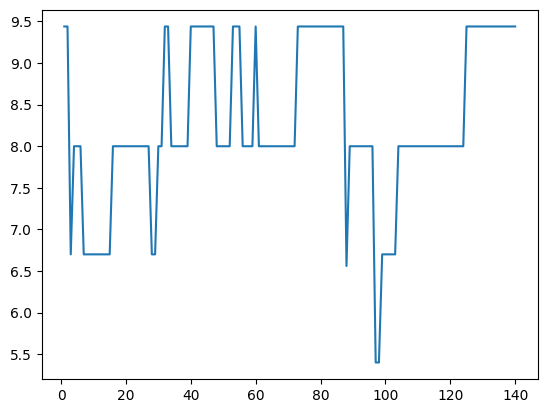

In [31]:
plt.figure()
plt.plot(t,tx_bw)